In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Take a quick look at the data

In [2]:
# Data: https://www.kaggle.com/competitions/titanic/overview

In [3]:
data = pd.read_csv('../data/titanic.csv')

In [4]:
print("First few rows of the dataset and shape:")
print(data.shape)
data.head()

First few rows of the dataset and shape:
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("\nData structure information:")
print(data.info())


Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print("\nSummary statistics of categorical columns:")
print(data.describe(include='O'))


Summary statistics of categorical columns:
                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [8]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [10]:
print("\nValue counts for the 'Sex' column:")
print(data['Sex'].value_counts())


Value counts for the 'Sex' column:
Sex
male      577
female    314
Name: count, dtype: int64


In [11]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


# Split the data into Training, Validation, and Test sets

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier

In [13]:
X = data.drop('Survived', axis=1)
y = data['Survived']

### Random Split

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nValue Counts for Target Variable (Random Split):")
print("Training set (Survived):")
print(y_train.value_counts(normalize=True)) 
print("\nValidation set (Survived):")
print(y_val.value_counts(normalize=True))    
print("\nTest set (Survived):")
print(y_test.value_counts(normalize=True))   


Value Counts for Target Variable (Random Split):
Training set (Survived):
Survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64

Validation set (Survived):
Survived
0    0.634831
1    0.365169
Name: proportion, dtype: float64

Test set (Survived):
Survived
0    0.575419
1    0.424581
Name: proportion, dtype: float64


### Stratified Split

In [15]:
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42, stratify=y_temp_strat)

print("\nValue Counts for Target Variable (Stratified Split):")
print("Training set (Survived):")
print(y_train_strat.value_counts(normalize=True))
print("\nValidation set (Survived):")
print(y_val_strat.value_counts(normalize=True))  
print("\nTest set (Survived):")
print(y_test_strat.value_counts(normalize=True)) 


Value Counts for Target Variable (Stratified Split):
Training set (Survived):
Survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64

Validation set (Survived):
Survived
0    0.617978
1    0.382022
Name: proportion, dtype: float64

Test set (Survived):
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


### Cross-validation (Data Leakage)

##### Wrong

In [16]:
X_clean = X.copy()
y_clean = y.copy()

dummy_clf = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(dummy_clf, X_clean, y_clean, cv=skf)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.61452514 0.61797753 0.61797753 0.61797753 0.61235955]


##### Right

In [17]:
dummy_clf = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

class DataCleaner:
    def fit(self, X, y=None):
        pass
    
    def transform(self, X):
        return X

cross_val_scores = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    cleaner = DataCleaner()

    cleaner.fit(X_train)

    X_train_cleaned = cleaner.transform(X_train)
    X_val_cleaned = cleaner.transform(X_val)

    dummy_clf.fit(X_train_cleaned, y_train)

    score = dummy_clf.score(X_val_cleaned, y_val)
    cross_val_scores.append(score)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.6145251396648045, 0.6179775280898876, 0.6179775280898876, 0.6179775280898876, 0.6123595505617978]


___

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [19]:
print(f"Training set (X_train, y_train) shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set (X_val, y_val) shape: {X_val.shape}, {y_val.shape}")
print(f"Test set (X_test, y_test) shape: {X_test.shape}, {y_test.shape}")

Training set (X_train, y_train) shape: (534, 11), (534,)
Validation set (X_val, y_val) shape: (178, 11), (178,)
Test set (X_test, y_test) shape: (179, 11), (179,)


In [20]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

___

# Exploratory Data Analysis (EDA)

### Analyze the target variable

Target variable distribution (Survived):
Survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64


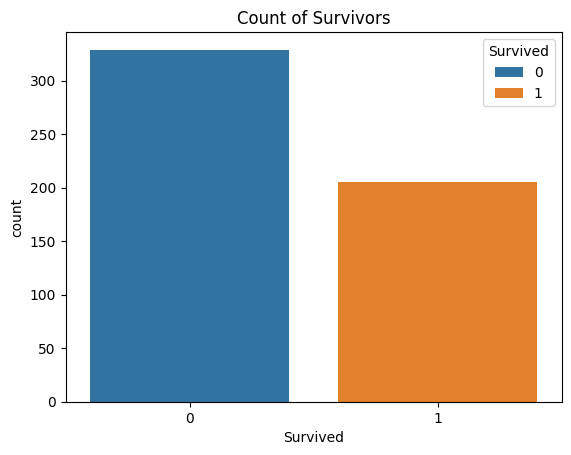

In [21]:
print("Target variable distribution (Survived):")
print(y_train.value_counts(normalize=True))
sns.countplot(x=y_train, hue=y_train)
plt.title('Count of Survivors')
plt.show()

### Assess Missing Values

In [22]:
print("\nMissing Values in Each Column:")
print(X_train.isnull().sum())


Missing Values in Each Column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            107
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          419
Embarked         2
dtype: int64


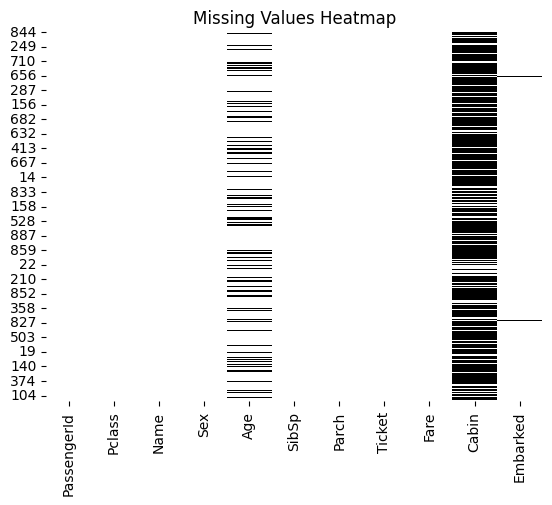

In [23]:
sns.heatmap(X_train.isnull(), cbar=False, cmap='binary')
plt.title('Missing Values Heatmap')
plt.show()

### Explore relationships between features and the target variable

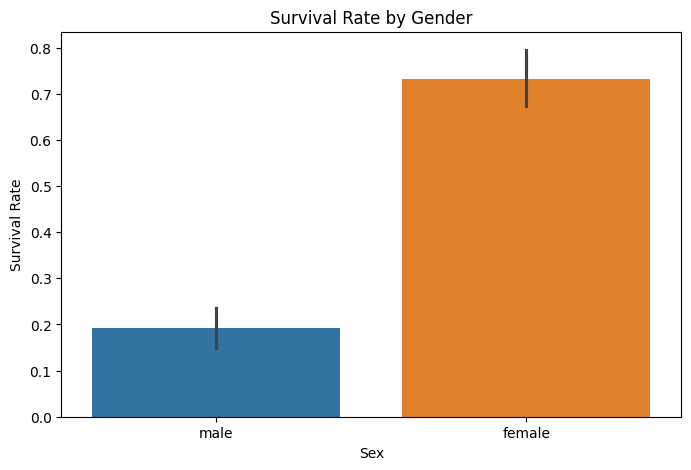

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y=y_train, data=X_train, hue='Sex')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

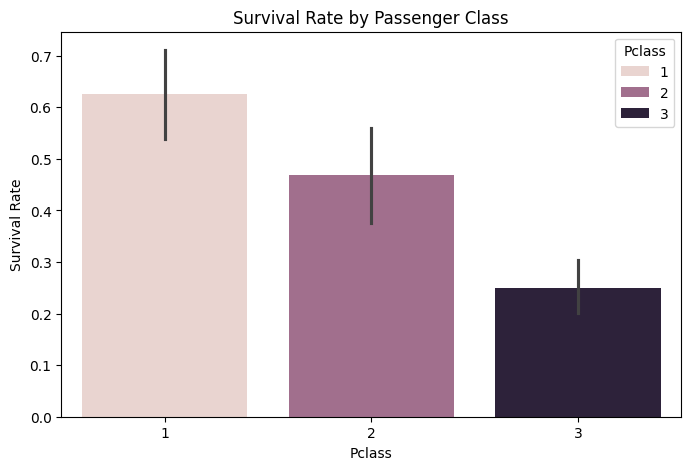

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y=y_train, data=X_train, hue='Pclass')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

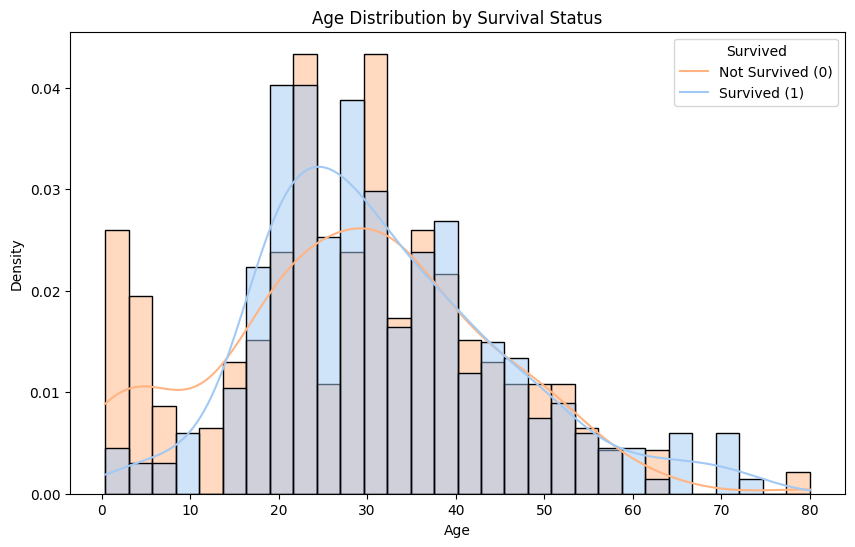

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='Age', hue=y_train, bins=30, kde=True, 
             palette='pastel', stat='density', common_norm=False)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

### Explore relationships between features and other features

corr

Correlation Matrix:
             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.033446  0.033496 -0.108968  0.009181  0.013203
Pclass         -0.033446  1.000000 -0.350902  0.079670  0.038286 -0.553851
Age             0.033496 -0.350902  1.000000 -0.281263 -0.172426  0.093516
SibSp          -0.108968  0.079670 -0.281263  1.000000  0.354140  0.102292
Parch           0.009181  0.038286 -0.172426  0.354140  1.000000  0.115481
Fare            0.013203 -0.553851  0.093516  0.102292  0.115481  1.000000


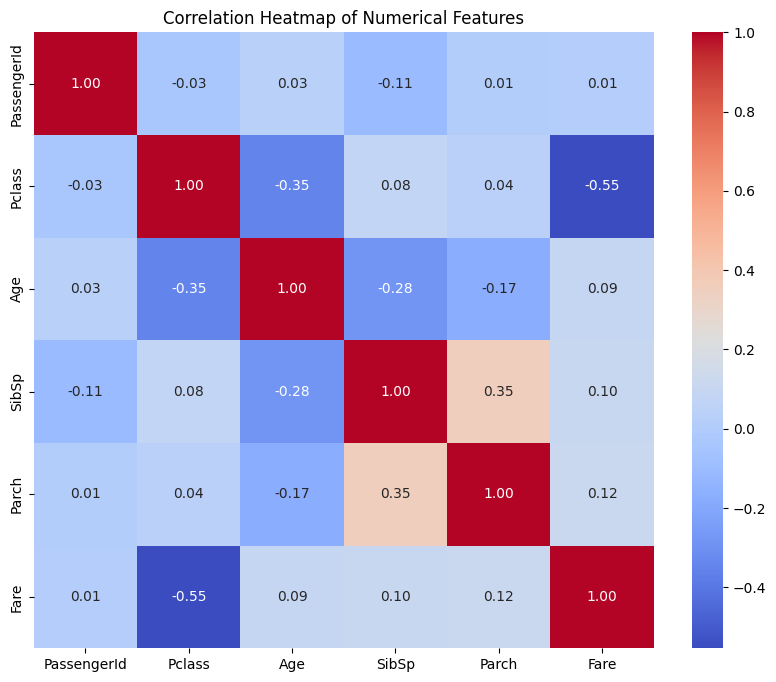

In [27]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_features.corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Split variables into numerical and categorical

In [28]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### Numerical Features

Discrete Features

In [29]:
discrete_var = [var for var in numerical_features if X_train[var].nunique() < 20]
print(len(discrete_var))
X_train[discrete_var].head()

3


,Pclass,SibSp,Parch
844,3,0,0
316,2,1,0
768,3,1,0
255,3,0,2
130,3,0,0


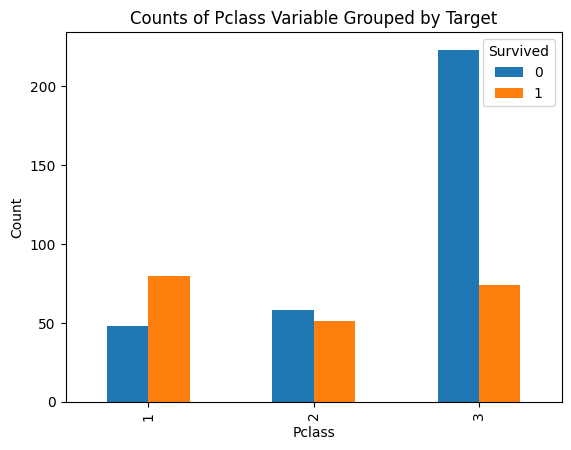

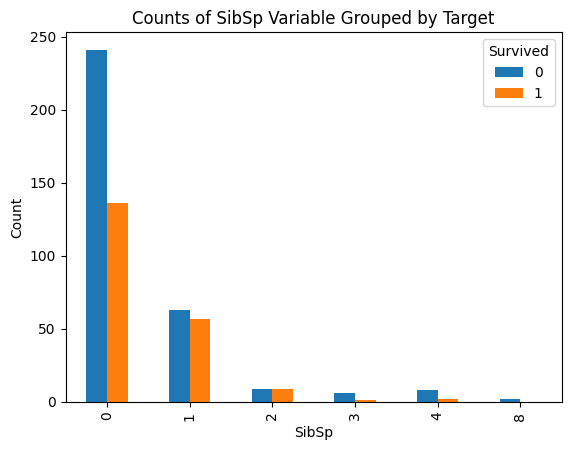

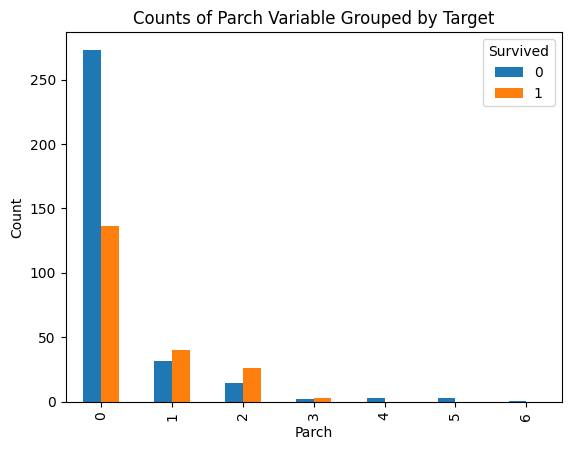

In [30]:
for var in discrete_var:
    ct = pd.crosstab(X_train[var], y_train)

    ct.plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Counts of {var} Variable Grouped by Target')
    plt.show()

Continuous Feature

In [31]:
continuous_var = [var for var in numerical_features if var not in discrete_var + ['PassengerId']]
print(len(continuous_var))
X_train[continuous_var].head()

2


,Age,Fare
844,17.0,8.6625
316,24.0,26.0000
768,NaN,24.1500
255,29.0,15.2458
130,33.0,7.8958


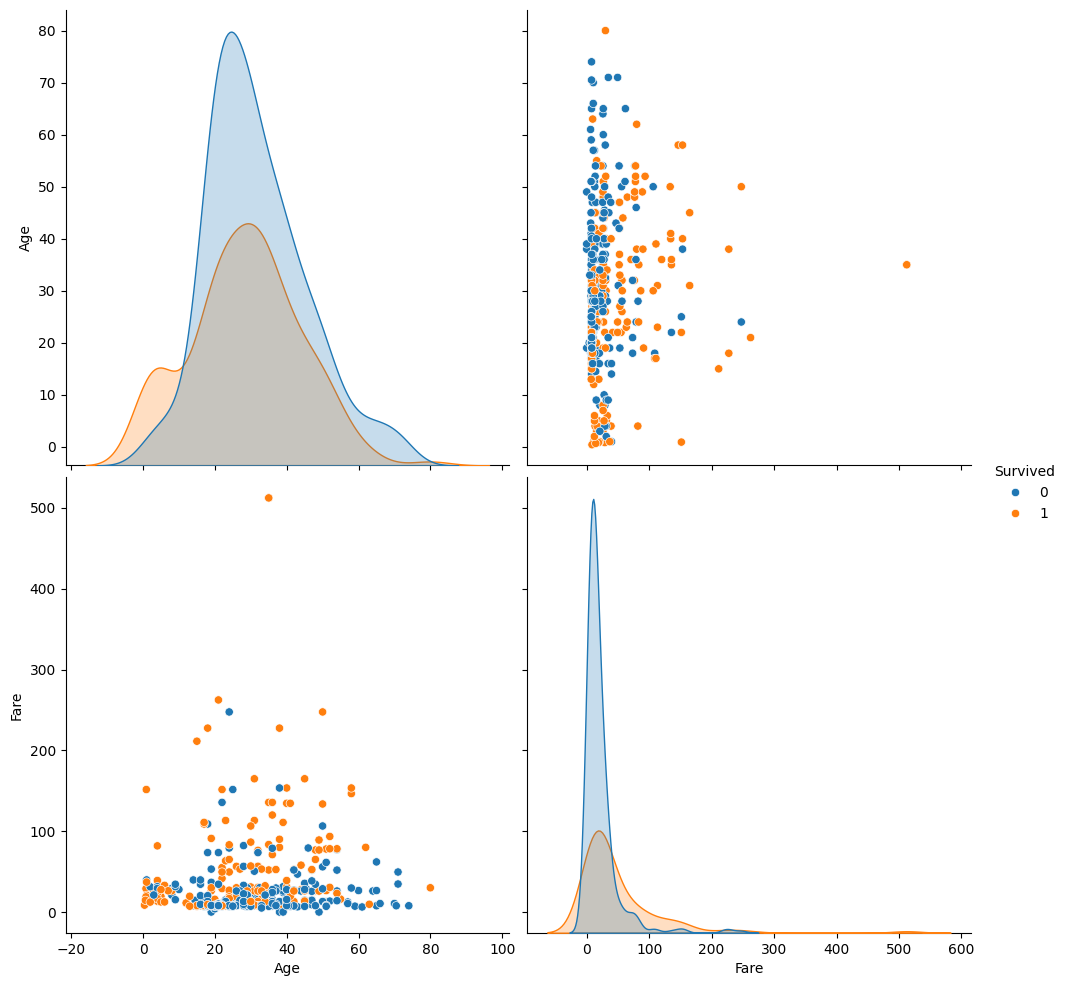

In [32]:
data_with_target = pd.concat([X_train[continuous_var], y_train], axis=1)

sns.pairplot(data_with_target, hue='Survived', height=5)

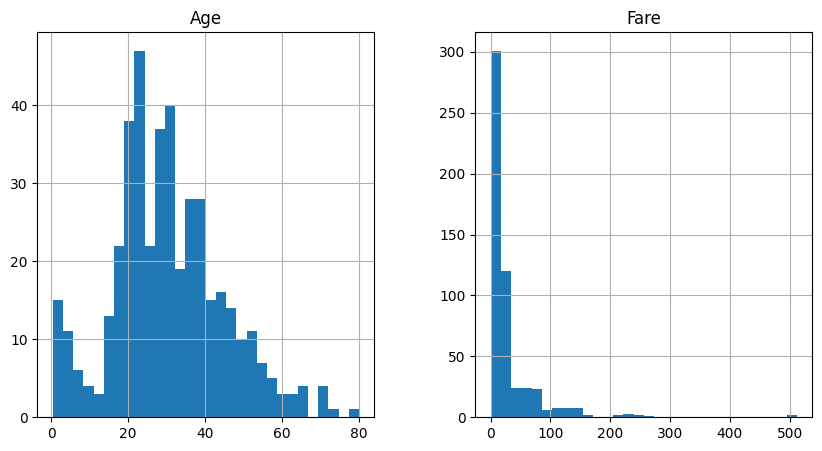

In [33]:
X_train[continuous_var].hist(bins=30, figsize=(10, 5));

### Categorical Feature

In [34]:
print(len(categorical_features))
X_train[categorical_features].head()

5


,Name,Sex,Ticket,Cabin,Embarked
844,"Culumovic, Mr. Jeso",male,315090,NaN,S
316,"Kantor, Mrs. Sinai (Miriam Sternin)",female,244367,NaN,S
768,"Moran, Mr. Daniel J",male,371110,NaN,Q
255,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,2650,NaN,C
130,"Drazenoic, Mr. Jozef",male,349241,NaN,C


Number of labels: Cardinality

Name        1.000000
Ticket      0.846442
Cabin       0.181648
Embarked    0.005618
Sex         0.003745
dtype: float64


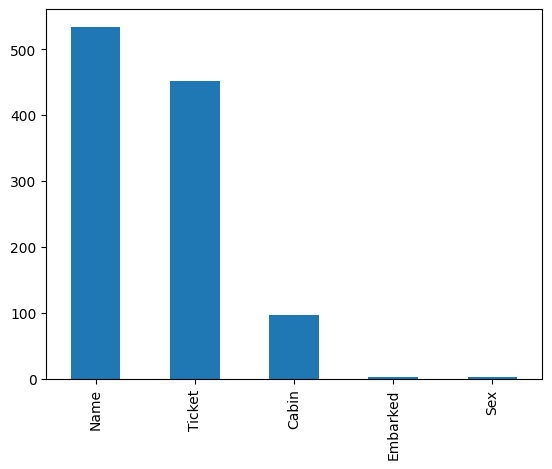

In [35]:
cardinalith = X_train[categorical_features].nunique().sort_values(ascending=False)
print(cardinalith / X_train.shape[0])
cardinalith.plot.bar();

# Data Cleaning

### Type Conversion

In [36]:
print("\nData Types Before Conversion:")
print(X_train.dtypes)

type_mapping = {
    'PassengerId': int,
    'Pclass': object,
    'Name': object,
    'Sex': object,
    'Age': float,
    'SibSp': int,
    'Parch': int,
    'Ticket': object,
    'Fare': float,
    'Cabin': object,
    'Embarked': object
}

for column, dtype in type_mapping.items():
    X_train[column] = X_train[column].astype(dtype)

print("\nData Types After Conversion:")
print(X_train.dtypes)


Data Types Before Conversion:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data Types After Conversion:
PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Filter Bad Data

In [37]:
X_train_filter = X_train.copy()

In [38]:
original_shape = X_train_filter.shape
print("\nOriginal shape of the data:")
print(original_shape)

bad_age_condition = (X_train_filter['Age'] < 5) | (X_train_filter['Age'] > 70)
bad_fare_condition = X_train_filter['Fare'] <= 0

filtered_data = X_train_filter[~(bad_age_condition | bad_fare_condition)]

filtered_shape = filtered_data.shape
print("\nShape of the data after filtering bad data:")
print(filtered_shape)

filtered_rows = original_shape[0] - filtered_shape[0]
print("\nNumber of rows filtered out:")
print(filtered_rows)


Original shape of the data:
(534, 11)

Shape of the data after filtering bad data:
(499, 11)

Number of rows filtered out:
35


### Replace and Map Categories to Fix Them

In [39]:
X_train['Sex'] = X_train['Sex'].replace({'male': 'Male', 'female': 'Female', 'F': 'Female', 'M': 'Male'})

print("\nUnique values in the 'Sex' column after mapping:")
print(X_train['Sex'].unique())


Unique values in the 'Sex' column after mapping:
['Male' 'Female']


### Drop Unnecessary Features

In [40]:
y_train = pd.DataFrame(y_train)
y_train.index = X_train['PassengerId']

In [41]:
X_train.set_index('PassengerId', inplace=True)  # Set 'PassengerId' as index
X_train.drop(columns=['Cabin', 'Ticket'], inplace=True)  # Drop unnecessary columns

print("\nShape of the data after dropping unnecessary features:")
print(X_train.shape)


Shape of the data after dropping unnecessary features:
(534, 8)


In [42]:
print("X:")
X_train.head()

X:


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
845,3,"Culumovic, Mr. Jeso",Male,17.0,0,0,8.6625,S
317,2,"Kantor, Mrs. Sinai (Miriam Sternin)",Female,24.0,1,0,26.0000,S
769,3,"Moran, Mr. Daniel J",Male,NaN,1,0,24.1500,Q
256,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",Female,29.0,0,2,15.2458,C
131,3,"Drazenoic, Mr. Jozef",Male,33.0,0,0,7.8958,C


In [43]:
print("y:")
y_train.head()

y:


,Survived
PassengerId,
845,0
317,1
769,0
256,1
131,0


___

# Feature Engineering and Transformation

### Transformations Applied to the Target Variable (y)

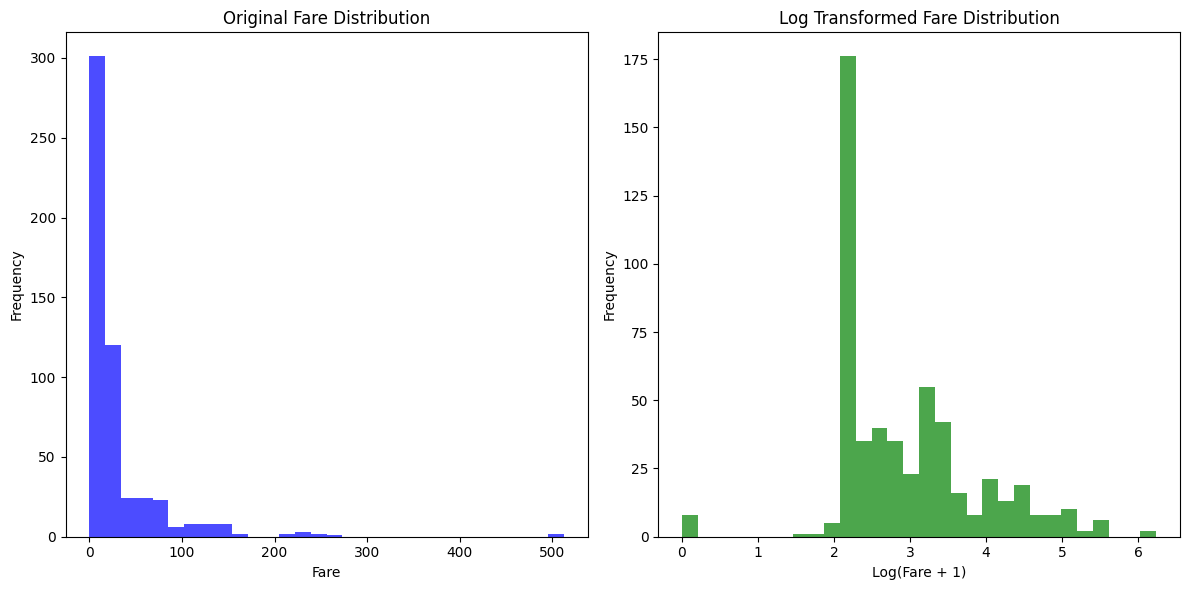

In [44]:
y_fake = X_train['Fare']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_fake, bins=30, color='blue', alpha=0.7)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

y_log = np.log1p(y_fake)

plt.subplot(1, 2, 2)
plt.hist(y_log, bins=30, color='green', alpha=0.7)
plt.title('Log Transformed Fare Distribution')
plt.xlabel('Log(Fare + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Imputing Missing Values

In [45]:
from sklearn.impute import SimpleImputer

print("\nMissing Values in Each Column Before Imputation:")
print(X_train.isnull().sum())

age_imputer = SimpleImputer(strategy='median')
embarked_imputer = SimpleImputer(strategy='most_frequent')

X_train['Age'] = age_imputer.fit_transform(X_train[['Age']])

X_train['Embarked'] = embarked_imputer.fit_transform(X_train[['Embarked']]).flatten()

print("\nMissing Values in Each Column After Imputation:")
print(X_train.isnull().sum())


Missing Values in Each Column Before Imputation:
Pclass        0
Name          0
Sex           0
Age         107
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Missing Values in Each Column After Imputation:
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Creating New Feature

In [46]:
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1

X_train['Title'] = X_train['Name'].str.extract(' ([A-Za-z]+)\.')

title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Mlle': 'Miss',
    'Ms': 'Mrs',
    'Mme': 'Mrs',
    'Don': 'Rare',
    'Dona': 'Rare',
    'Jonkheer': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare'
}
X_train['Title'] = X_train['Title'].map(title_mapping)
X_train['Title'] = X_train['Title'].fillna('Rare')

X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,
845,3,"Culumovic, Mr. Jeso",Male,17.0,0,0,8.6625,S,1,Mr
317,2,"Kantor, Mrs. Sinai (Miriam Sternin)",Female,24.0,1,0,26.0000,S,2,Mrs
769,3,"Moran, Mr. Daniel J",Male,29.0,1,0,24.1500,Q,2,Mr
256,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",Female,29.0,0,2,15.2458,C,3,Mrs
131,3,"Drazenoic, Mr. Jozef",Male,33.0,0,0,7.8958,C,1,Mr


### Drop features

In [47]:
from feature_engine.selection import DropFeatures

drop_features = DropFeatures(features_to_drop=['Name', 'SibSp', 'Parch'])

X_train = drop_features.fit_transform(X_train)

X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,
845,3,Male,17.0,8.6625,S,1,Mr
317,2,Female,24.0,26.0000,S,2,Mrs
769,3,Male,29.0,24.1500,Q,2,Mr
256,3,Female,29.0,15.2458,C,3,Mrs
131,3,Male,33.0,7.8958,C,1,Mr


### Encoding categorical variables


In [48]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_embarked_encoded = one_hot_encoder.fit_transform(X_train[['Embarked']])

X_train_embarked_encoded = pd.DataFrame(X_train_embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']), index=X_train.index)

X_train = pd.concat([X_train.drop('Embarked', axis=1), X_train_embarked_encoded], axis=1)

In [49]:
label_encoder_sex = LabelEncoder()
label_encoder_title = LabelEncoder()

X_train['Sex'] = label_encoder_sex.fit_transform(X_train['Sex'])
X_train['Title'] = label_encoder_title.fit_transform(X_train['Title'])

# Feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

standard_scaler_features = ['Pclass', 'Age', 'Sex', 'FamilySize', 'Title', 'Embarked_Q', 'Embarked_S']

X_train[standard_scaler_features] = standard_scaler.fit_transform(X_train[standard_scaler_features])

In [51]:
min_max_scaler = MinMaxScaler()
min_max_scaler_features = ['Fare']
X_train[min_max_scaler_features] = min_max_scaler.fit_transform(X_train[min_max_scaler_features])

In [52]:
X_train

,Pclass,Sex,Age,Fare,FamilySize,Title,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
845,0.819472,0.743186,-1.009092,0.016908,-0.570526,0.102505,-0.303355,0.642416
317,-0.379427,-1.345558,-0.470634,0.050749,0.129844,1.375475,-0.303355,0.642416
769,0.819472,0.743186,-0.086022,0.047138,0.129844,0.102505,3.296463,-1.556624
256,0.819472,-1.345558,-0.086022,0.029758,0.830213,1.375475,-0.303355,-1.556624
131,0.819472,0.743186,0.221668,0.015412,-0.570526,0.102505,-0.303355,-1.556624
...,...,...,...,...,...,...,...,...
477,-0.379427,0.743186,0.298590,0.040989,0.129844,0.102505,-0.303355,0.642416
59,-0.379427,-1.345558,-1.932161,0.054164,1.530583,-1.170465,-0.303355,0.642416
737,0.819472,-1.345558,1.375505,0.067096,2.230953,1.375475,-0.303355,0.642416


# Final Data Preparation


### Build transformation pipelines

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

class TypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, type_mapping):
        self.type_mapping = type_mapping
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for column, dtype in self.type_mapping.items():
            X_copy[column] = X_copy[column].astype(dtype)
        return X_copy

class SetIndexByPassengerId(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        X_copy.set_index('PassengerId', inplace=True)
        
        return X_copy
    
class SexMappingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, sex_col):
        self.mapping = {'male': 'Male', 'female': 'Female', 'F': 'Female', 'M': 'Male'}
        self.sex_col = sex_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        X_copy[self.sex_col] = X_copy[self.sex_col].replace(self.mapping)
        return X_copy
    
class ColumnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', column_name=None):
        self.strategy = strategy
        self.column_name = column_name
        self.imputer = SimpleImputer(strategy=self.strategy)
        
    def fit(self, X, y=None):
        self.imputer.fit(X[[self.column_name]])
        return self
    ""
    def transform(self, X):
        X_copy = X.copy()
        if self.strategy == 'most_frequent':
            X_copy[self.column_name] = self.imputer.transform(X[[self.column_name]]).flatten()
        else:
            X_copy[self.column_name] = self.imputer.transform(X[[self.column_name]])
        return X_copy
    
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, add_title=True, add_family_size=True):
        self.add_title = add_title
        self.add_family_size = add_family_size
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        if self.add_family_size:
            X_copy['FamilySize'] = X_copy['SibSp'] + X_copy['Parch'] + 1
        
        if self.add_title:
            X_copy['Title'] = X_copy['Name'].str.extract(' ([A-Za-z]+)\.')
            
            title_mapping = {
                'Mr': 'Mr',
                'Mrs': 'Mrs',
                'Miss': 'Miss',
                'Master': 'Master',
                'Dr': 'Rare',
                'Rev': 'Rare',
                'Col': 'Rare',
                'Mlle': 'Miss',
                'Ms': 'Mrs',
                'Mme': 'Mrs',
                'Don': 'Rare',
                'Dona': 'Rare',
                'Jonkheer': 'Rare',
                'Lady': 'Rare',
                'Sir': 'Rare'
            }
            X_copy['Title'] = X_copy['Title'].map(title_mapping)
            X_copy['Title'] = X_copy['Title'].fillna('Rare')  # Fill missing titles as 'Rare'
        
        return X_copy
    
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column=None, drop_first=True):
        self.column = column
        self.drop_first = drop_first
        self.encoder = OneHotEncoder(drop='first', sparse_output=False)
        
    def fit(self, X, y=None):
        if self.column:
            self.encoder.fit(X[self.column])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        if self.column:
            X_encoded = self.encoder.transform(X_copy[self.column])
            encoded_df = pd.DataFrame(X_encoded, columns=self.encoder.get_feature_names_out(self.column), index=X_copy.index)
            X_copy = pd.concat([X_copy.drop(self.column, axis=1), encoded_df], axis=1)
        return X_copy
    
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column=None):
        self.column = column
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        if self.column:
            self.encoder.fit(X[self.column])
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.column:
            X_copy[self.column] = self.encoder.transform(X_copy[self.column])
        return X_copy
    
class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standard_scaler_features=None, min_max_scaler_features=None):
        self.standard_scaler_features = standard_scaler_features
        self.min_max_scaler_features = min_max_scaler_features
        self.standard_scaler = StandardScaler()
        self.min_max_scaler = MinMaxScaler()

    def fit(self, X, y=None):
        if self.standard_scaler_features:
            self.standard_scaler.fit(X[self.standard_scaler_features])
        
        if self.min_max_scaler_features:
            self.min_max_scaler.fit(X[self.min_max_scaler_features])

        return self

    def transform(self, X):
        X_copy = X.copy()
        
        if self.standard_scaler_features:
            X_copy[self.standard_scaler_features] = self.standard_scaler.transform(X_copy[self.standard_scaler_features])
        
        if self.min_max_scaler_features:
            X_copy[self.min_max_scaler_features] = self.min_max_scaler.transform(X_copy[self.min_max_scaler_features])

        return X_copy

In [54]:
type_mapping = {
    'PassengerId': int,
    'Pclass': object,
    'Name': object,
    'Sex': object,
    'Age': float,
    'SibSp': int,
    'Parch': int,
    'Ticket': object,
    'Fare': float,
    'Cabin': object,
    'Embarked': object
}

sex_mapping = 'Sex'
unnecessary_features = ['Cabin', 'Ticket']
median_imputer = 'Age'
most_freq_imputer = 'Embarked'
add_title = True
add_family_size = True
features_to_drop = ['Name', 'SibSp', 'Parch']
embarked_encoder = 'Embarked'
sex_encoder = 'Sex'
title_encoder = 'Title'
standard_scaler_features = ['Pclass', 'Age', 'Sex', 'FamilySize', 'Title', 'Embarked_Q', 'Embarked_S']
min_max_scaler_features = ['Fare']

In [55]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures

y_train_cleaned = pd.DataFrame(y_train_copy)
y_train_cleaned.index = X_train_copy['PassengerId']

pipeline = Pipeline(steps=[
    ('type_converter', TypeConverter(type_mapping)),
    ('sex_mapping', SexMappingTransformer(sex_col=sex_mapping)),
    ('set_index', SetIndexByPassengerId()),
    ('drop_unnecessary_features', DropFeatures(features_to_drop=unnecessary_features)),
    ('age_imputer', ColumnImputer(strategy='median', column_name=median_imputer)),
    ('embarked_imputer', ColumnImputer(strategy='most_frequent', column_name=most_freq_imputer)),
    ('feature_engineering', FeatureEngineering(add_title=add_title, add_family_size=add_family_size)),
    ('drop_features', DropFeatures(features_to_drop=features_to_drop)),
    ('onehot_encoder', OneHotEncoderTransformer(column=[embarked_encoder])),
    ('sex_label_encoder', LabelEncoderTransformer(column=sex_encoder)),
    ('title_label_encoder', LabelEncoderTransformer(column=title_encoder)),
    ('scaler', ScalerTransformer(standard_scaler_features=standard_scaler_features,
                                 min_max_scaler_features=min_max_scaler_features)),
])

X_train_cleaned = pipeline.fit_transform(X_train_copy)

In [56]:
assert X_train_cleaned.equals(X_train), "X_train and X_train_copy are not the same after transformation!"
assert y_train_cleaned.equals(y_train), "y_train and y_train_copy are not the same after transformation!"

---

# Model Selection and Training

### Select appropriate algorithms using validation

In [57]:
y_val_cleaned = pd.DataFrame(y_val)
y_val_cleaned.index = X_val['PassengerId']
X_val_cleaned = pipeline.transform(X_val)

1. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_log_reg = log_reg_model.predict(X_train_cleaned)
y_val_pred_log_reg = log_reg_model.predict(X_val_cleaned)

acc_train_log_reg = accuracy_score(y_train_cleaned, y_train_pred_log_reg)
acc_val_log_reg = accuracy_score(y_val_cleaned, y_val_pred_log_reg)

print("Logistic Regression Accuracy:")
print(f"Training Accuracy: {acc_train_log_reg:.4f}")
print(f"Validation Accuracy: {acc_val_log_reg:.4f}")


Logistic Regression Accuracy:
Training Accuracy: 0.7959
Validation Accuracy: 0.8090


2. K-Nearest Neighbors (KNN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_knn = knn_model.predict(X_train_cleaned)
y_val_pred_knn = knn_model.predict(X_val_cleaned)

acc_train_knn = accuracy_score(y_train_cleaned, y_train_pred_knn)
acc_val_knn = accuracy_score(y_val_cleaned, y_val_pred_knn)

print("KNN Accuracy:")
print(f"Training Accuracy: {acc_train_knn:.4f}")
print(f"Validation Accuracy: {acc_val_knn:.4f}")

KNN Accuracy:
Training Accuracy: 0.8408
Validation Accuracy: 0.8258


3. Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_dt = decision_tree_model.predict(X_train_cleaned)
y_val_pred_dt = decision_tree_model.predict(X_val_cleaned)

acc_train_dt = accuracy_score(y_train_cleaned, y_train_pred_dt)
acc_val_dt = accuracy_score(y_val_cleaned, y_val_pred_dt)

print("Decision Tree Accuracy:")
print(f"Training Accuracy: {acc_train_dt:.4f}")
print(f"Validation Accuracy: {acc_val_dt:.4f}")

Decision Tree Accuracy:
Training Accuracy: 0.9794
Validation Accuracy: 0.7472


4. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_rf = random_forest_model.predict(X_train_cleaned)
y_val_pred_rf = random_forest_model.predict(X_val_cleaned)

acc_train_rf = accuracy_score(y_train_cleaned, y_train_pred_rf)
acc_val_rf = accuracy_score(y_val_cleaned, y_val_pred_rf)

print("Random Forest Accuracy:")
print(f"Training Accuracy: {acc_train_rf:.4f}")
print(f"Validation Accuracy: {acc_val_rf:.4f}")

Random Forest Accuracy:
Training Accuracy: 0.9794
Validation Accuracy: 0.7809


### Analyze the best models and their errors

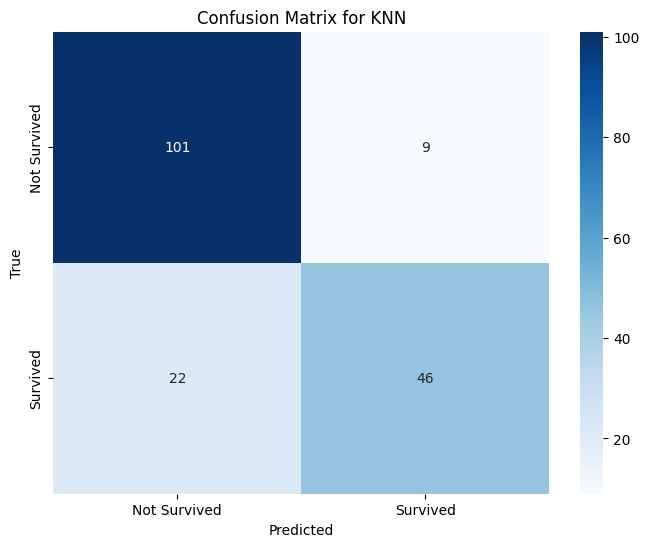

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_val_pred_knn = knn_model.predict(X_val_cleaned)

conf_matrix = confusion_matrix(y_val_cleaned, y_val_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_val_cleaned, y_val_pred_knn))

### Train models using pipeline

In [63]:
data = pd.read_csv('../data/titanic.csv')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [64]:
combined_pipeline = Pipeline(steps=[
    ('preprocessing', pipeline),
    ('model', KNeighborsClassifier())
])

In [65]:
combined_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('type_converter',
                                  TypeConverter(type_mapping={'Age': <class 'float'>,
                                                              'Cabin': <class 'object'>,
                                                              'Embarked': <class 'object'>,
                                                              'Fare': <class 'float'>,
                                                              'Name': <class 'object'>,
                                                              'Parch': <class 'int'>,
                                                              'PassengerId': <class 'int'>,
                                                              'Pclass': <class 'object'>,
                                                              'Sex': <class 'object'>,
                                                              'SibSp': <class 'int'>,
                                                              'Ticket': <class 'object...
                                  OneHotEncoderTransformer(column=['Embarked'])),
                                 ('sex_label_encoder',
                                  LabelEncoderTransformer(column='Sex')),
                                 ('title_label_encoder',
                                  LabelEncoderTransformer(column='Title')),
                                 ('scaler',
                                  ScalerTransformer(min_max_scaler_features=['Fare'],
                                                    standard_scaler_features=['Pclass',
                                                                              'Age',
                                                                              'Sex',
                                                                              'FamilySize',
                                                                              'Title',
                                                                              'Embarked_Q',
                                                                              'Embarked_S']))])),
                ('model', KNeighborsClassifier())])

In [66]:
y_train_pred = combined_pipeline.predict(X_train)
y_val_pred = combined_pipeline.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("\nKNN Model Accuracy:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


KNN Model Accuracy:
Training Accuracy: 0.8408
Validation Accuracy: 0.8258


# Fine-Tuning the Model

### Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=combined_pipeline,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Accuracy (Grid Search):", grid_search.best_score_)

best_pipeline_grid = grid_search.best_estimator_
y_val_pred_grid = best_pipeline_grid.predict(X_val)
val_acc_grid = accuracy_score(y_val, y_val_pred_grid)
print(f"Validation Accuracy (Grid Search): {val_acc_grid:.4f}")

Best Parameters (Grid Search): {'model__metric': 'manhattan', 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best Accuracy (Grid Search): 0.8108799153588432
Validation Accuracy (Grid Search): 0.8427


In [68]:
results_df = pd.DataFrame(grid_search.cv_results_)

print("All Grid Search Results:")
results_df[['param_model__n_neighbors', 'param_model__weights', 'param_model__metric', 'mean_test_score']]


All Grid Search Results:


,param_model__n_neighbors,param_model__weights,param_model__metric,mean_test_score
0,3,uniform,euclidean,0.775331
1,3,distance,euclidean,0.756657
2,5,uniform,euclidean,0.790284
3,5,distance,euclidean,0.779087
4,7,uniform,euclidean,0.799647
5,7,distance,euclidean,0.777217
6,9,uniform,euclidean,0.805290
7,9,distance,euclidean,0.777235
8,3,uniform,manhattan,0.784676
9,3,distance,manhattan,0.760377


### Randomized Search

In [69]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distributions = {
    'model__n_neighbors': np.arange(1, 20),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'chebyshev']
}

random_search = RandomizedSearchCV(
    estimator=combined_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters (Randomized Search):", random_search.best_params_)
print("Best Accuracy (Randomized Search):", random_search.best_score_)

best_pipeline_random = random_search.best_estimator_
y_val_pred_random = best_pipeline_random.predict(X_val)
val_acc_random = accuracy_score(y_val, y_val_pred_random)
print(f"Validation Accuracy (Randomized Search): {val_acc_random:.4f}")

Best Parameters (Randomized Search): {'model__weights': 'uniform', 'model__n_neighbors': 15, 'model__metric': 'manhattan'}
Best Accuracy (Randomized Search): 0.8221301357785225
Validation Accuracy (Randomized Search): 0.8258


In [70]:
results_df = pd.DataFrame(random_search.cv_results_)

print("All Random Search Results:")
results_df[['param_model__n_neighbors', 'param_model__weights', 'param_model__metric', 'mean_test_score']]

All Random Search Results:


,param_model__n_neighbors,param_model__weights,param_model__metric,mean_test_score
0,3,uniform,chebyshev,0.771539
1,3,uniform,euclidean,0.775331
2,2,uniform,manhattan,0.764098
3,16,distance,manhattan,0.790337
4,6,uniform,euclidean,0.809028
5,4,distance,manhattan,0.762247
6,17,uniform,manhattan,0.812784
7,15,uniform,manhattan,0.822130
8,5,distance,manhattan,0.777217
9,6,distance,euclidean,0.767872


In [71]:
random_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('type_converter',
                                  TypeConverter(type_mapping={'Age': <class 'float'>,
                                                              'Cabin': <class 'object'>,
                                                              'Embarked': <class 'object'>,
                                                              'Fare': <class 'float'>,
                                                              'Name': <class 'object'>,
                                                              'Parch': <class 'int'>,
                                                              'PassengerId': <class 'int'>,
                                                              'Pclass': <class 'object'>,
                                                              'Sex': <class 'object'>,
                                                              'SibSp': <class 'int'>,
                                                              'Ticket': <class 'object...
                                 ('sex_label_encoder',
                                  LabelEncoderTransformer(column='Sex')),
                                 ('title_label_encoder',
                                  LabelEncoderTransformer(column='Title')),
                                 ('scaler',
                                  ScalerTransformer(min_max_scaler_features=['Fare'],
                                                    standard_scaler_features=['Pclass',
                                                                              'Age',
                                                                              'Sex',
                                                                              'FamilySize',
                                                                              'Title',
                                                                              'Embarked_Q',
                                                                              'Embarked_S']))])),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15))])

In [72]:
import pickle

best_pipeline_random = random_search.best_estimator_

with open('../best_pipeline_random.pkl', 'wb') as f:
    pickle.dump(best_pipeline_random, f)

print("Pipeline saved to 'best_pipeline_random.pkl'.")

Pipeline saved to 'best_pipeline_random.pkl'.


### Evaluate your system on the Test Set

In [73]:
from sklearn.metrics import accuracy_score

with open('../best_pipeline_random.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

print("Pipeline loaded successfully.")

y_test_pred = loaded_pipeline.predict(X_test)

test_acc = accuracy_score(y_test, y_test_pred)

print("\nEvaluation Results:")
print(f"Test Accuracy: {test_acc:.4f}")

Pipeline loaded successfully.

Evaluation Results:
Test Accuracy: 0.8380
